<a href="https://colab.research.google.com/github/DmitriyDikunov/python-4-7/blob/main/%D0%94%D1%96%D0%BA%D1%83%D0%BD%D0%BE%D0%B2%D0%9B%D0%90%D0%916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
Розмір навчальної вибірки: (14448, 8)
Розмір тестової вибірки: (6192, 8)


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.5305677824766758
R^2 Score: 0.595770232606166


In [3]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Mean Squared Error на навчальній вибірці: {train_mse}")
print(f"R^2 Score на навчальній вибірці: {train_r2}")


Mean Squared Error на навчальній вибірці: 0.5233576288267754
R^2 Score на навчальній вибірці: 0.609345972797216


In [4]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
lasso = Lasso()
params = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_search = GridSearchCV(ridge, param_grid=params, cv=5)
ridge_search.fit(X_train, y_train)
lasso_search = GridSearchCV(lasso, param_grid=params, cv=5)
lasso_search.fit(X_train, y_train)
print(f"Найкращий параметр alpha для Ridge: {ridge_search.best_params_}")
print(f"Найкращий параметр alpha для Lasso: {lasso_search.best_params_}")


Найкращий параметр alpha для Ridge: {'alpha': 0.1}
Найкращий параметр alpha для Lasso: {'alpha': 0.1}


In [5]:
ridge_pred = ridge_search.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_pred = lasso_search.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Ridge Mean Squared Error: {ridge_mse}")
print(f"Ridge R^2 Score: {ridge_r2}")
print(f"Lasso Mean Squared Error: {lasso_mse}")
print(f"Lasso R^2 Score: {lasso_r2}")


Ridge Mean Squared Error: 0.530561502747035
Ridge R^2 Score: 0.5957750170158793
Lasso Mean Squared Error: 0.5970512258509185
Lasso R^2 Score: 0.5451177283676661


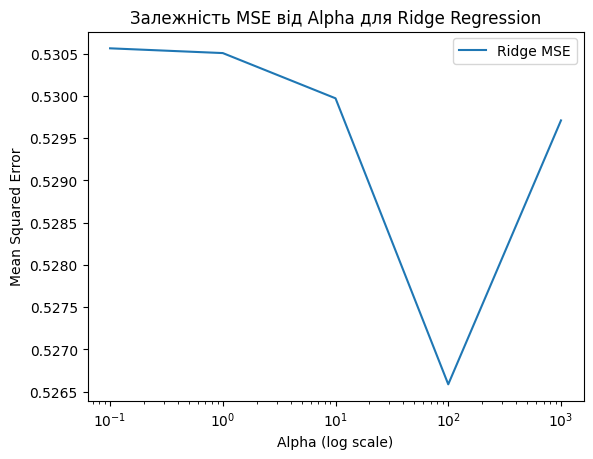

In [6]:
import matplotlib.pyplot as plt
alphas = [0.1, 1, 10, 100, 1000]
ridge_mses = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_mses.append(mean_squared_error(y_test, y_pred_ridge))
plt.plot(alphas, ridge_mses, label='Ridge MSE')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Залежність MSE від Alpha для Ridge Regression')
plt.legend()
plt.show()